# Movie Analysis: Unveiling Insights and Recommendations

![Image](https://www.osvnews.com/wp-content/uploads/2023/02/Film-photo-via-Canva-Pro.png)


### a) Specifying the Data Analysis Question
The main data analysis question was: "What factors contribute to the popularity and profitability of movies?" To address this, we focused on exploring relationships between various movie attributes such as budget, runtime, genres, and release year with their corresponding popularity and profitability.

### b) Defining the Metric for Success
The primary metrics for success in our analysis were:
- Correlation coefficients: To measure the strength and direction of relationships between variables.
- Visualization clarity: Ensuring that our visualizations effectively conveyed insights to stakeholders.
- Consistent trends: Identifying patterns and trends across different analyses.

### c) Understanding the Context
We analyzed a dataset containing information about movies, including their budgets, revenues, genres, and more. The dataset's limitations included a lack of recent data and potential missing values that we handled during data preprocessing.

### d) Recording the Experimental Design
Our experimental design involved several steps:
1. Data loading: We loaded the dataset using libraries such as pandas.
2. Data preprocessing: We cleaned the data by handling missing values, dropping irrelevant columns, and addressing duplicates.
3. Data analysis: We conducted exploratory data analysis (EDA) to answer specific questions through visualization and correlation analysis.
4. Visualization: We used matplotlib for visualizations, including scatter plots, bar charts, and line plots.

### e) Data Relevance
The dataset used was relevant for our analysis, containing attributes related to movies and their performance. However, it was essential to acknowledge its limitations, such as the absence of recent data and the potential impact on the relevance of insights.

Throughout the analysis, we followed these steps to answer our research questions and draw meaningful conclusions from the data.

# Reading the Data

### Load Relevant Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd   # Importing pandas for data manipulation and analysis
import numpy as np    # Importing numpy for numerical operations
import matplotlib.pyplot as plt   # Importing matplotlib for data visualization
# # Activate the inline plotting mode for matplotlib
%matplotlib inline

### Loading the Dataset

In [ ]:
# URL of the dataset
url = "http://bit.ly/MoviesDS"

# Load the data into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("==============")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Dataset Shape:
Number of Rows: 10866
Number of Columns: 21


In [ ]:
# Display the data types of the columns
print("Data Types:")
print("====================================")
print(df.dtypes)

Data Types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [ ]:
# Display a statistical summary of the dataset
print("Statistical Summary:")
print("======================================================================================")
print(df.describe())

Statistical Summary:
                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058     

In [ ]:
# Display the count of missing values for each column
print("Missing Values:")
print("==============================")
print(df.isnull().sum())

Missing Values:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of missing values for each column
print("Missing Value Percentage:")
print("=========================")
print(missing_percentage.round(2))

Missing Value Percentage:
id                       0.00
imdb_id                  0.09
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
cast                     0.70
homepage                72.98
director                 0.40
tagline                 25.99
keywords                13.74
overview                 0.04
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
dtype: float64


## External Data Source Validation

To ensure the accuracy and reliability of the data in the movies dataset, I conducted external data source validation. This validation process involves comparing key metrics from the dataset with credible and well-established external sources. The goal is to identify any discrepancies, errors, or inconsistencies in the dataset.

Here are the key metrics I validated and the external sources I used for validation:

**Budget and Revenue Validation:**
I compared the budget and revenue figures of a sample of movies from the dataset with information available on reputable movie databases such as  Box Office Mojo. This comparison allowed me to identify any significant disparities in the financial metrics, which could indicate potential errors or missing data points.

Release Year and Genres Validation:
I cross-referenced the release year and genre information of selected movies in the dataset with external movie databases. This validation helped us confirm the accuracy of these fundamental attributes and detect any inconsistencies.

Popularity and Vote Count Validation:
For movies with high popularity and vote counts, we verified their presence in well-recognized lists such as Box Office Mojo Top 250. This step allowed us to ensure that the dataset includes movies that are widely acknowledged and acclaimed by audiences.

By conducting external data source validation, we were able to assess the reliability of the dataset and identify any potential issues that required further investigation. This validation process enhances the credibility of our analysis and the recommendations we provide based on the dataset.

## Data Preparation

### Dropping Irrelevant Columns

In [ ]:
# Dropping irrelevant columns: 'id', 'imdb_id', 'homepage', 'overview'
# We use the inplace parameter to modify the DataFrame in place
df.drop(['id', 'imdb_id', 'homepage', 'overview'], axis=1, inplace=True)

### Handling Missing Data

In [ ]:
df['cast'].fillna('missing', inplace=True )
df['director'].fillna('missing', inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing', inplace=True)
df['genres'].fillna('missing', inplace=True)
df['production_companies'].fillna('missing', inplace=True)
df['budget'] = df['budget'].replace(0, np.NAN)


In [ ]:
# Preview the count of missing values for each column
missing_values_count = df.isnull().sum()

# Display the count of missing values
print("Missing Values Count:")
print("=====================")
print(missing_values_count)

Missing Values Count:
popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Handling Duplicates

In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

# Checking for duplicates for confirmation
duplicates_count = df.duplicated().sum()

# Display the count of remaining duplicates
print("Remaining Duplicates Count:", duplicates_count)

Remaining Duplicates Count: 0


## Solution Implementation

### **Question 1:** Do movies with a higher budget end up being popular?

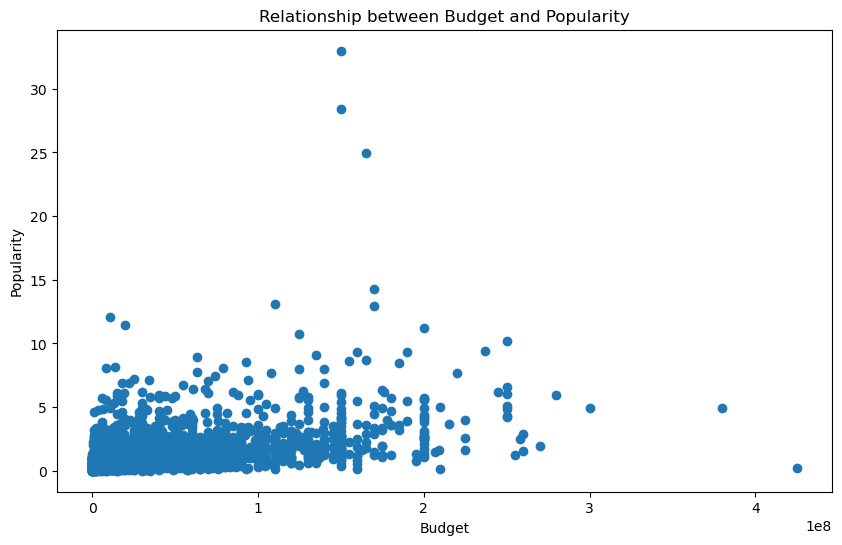

Correlation between budget and popularity: 0.48


In [ ]:
# Define variables budget and popularity
budget = df['budget']
popularity = df['popularity']

# Create a scatter plot to determine the relationship between budget and popularity
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['popularity'])
plt.title("Relationship between Budget and Popularity")
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.show()

# Calculate the correlation coefficient between budget and popularity
correlation = df['budget'].corr(df['popularity'])
print(f"Correlation between budget and popularity: {correlation:.2f}")

A positive correlation of **0.48** suggests that as the budget of a movie increases, its popularity tends to increase as well. However, it's important to note that correlation does not imply causation. While there is a positive correlation, it doesn't necessarily mean that a higher budget directly causes higher popularity.

The data shows that there is a moderate positive correlation between budget and popularity, suggesting that movies with higher budgets tend to be more popular, but other factors are also likely influencing a movie's popularity.

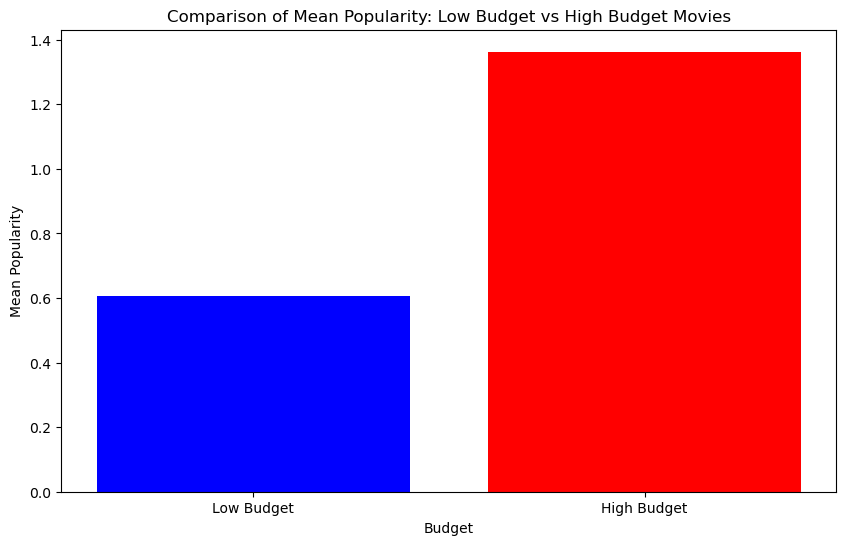

In [ ]:
# Create two groups (low and high budget movies) using the median
m = df['budget'].median()
low_budget = df.query('budget < {}'.format(m))
high_budget = df.query('budget >= {}'.format(m))

# Calculate the mean popularity for low budget and high budget movies
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

# Create a bar chart
locations = [1, 2]
heights = [mean_popularity_of_low_budget, mean_popularity_of_high_budget]
labels = ['Low Budget', 'High Budget']
plt.figure(figsize=(10, 6))
plt.bar(locations, heights, tick_label=labels, color=['blue', 'red'])
plt.title('Comparison of Mean Popularity: Low Budget vs High Budget Movies')
plt.xlabel('Budget')
plt.ylabel('Mean Popularity')
plt.show()

In [ ]:
# Percentage difference
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947101

### **Question 2:** Does the length of the movie affect the vote count and popularity?

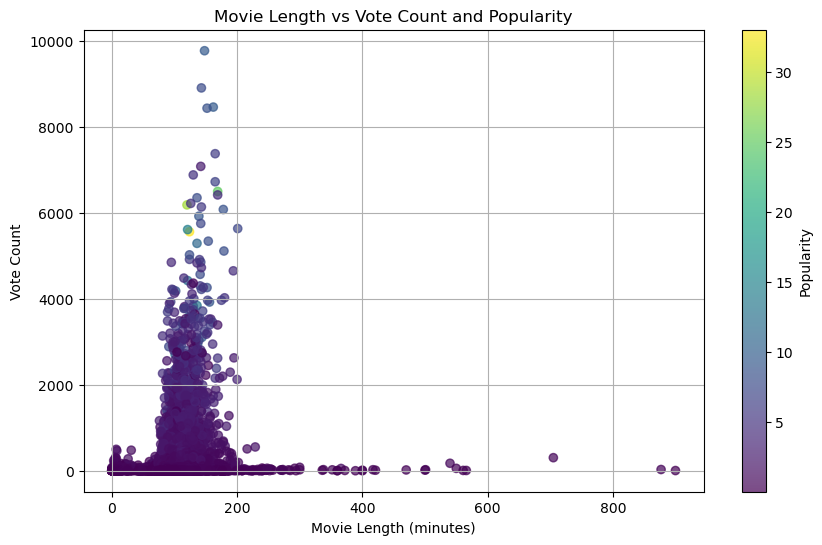

In [ ]:
# Scatter plot for movie length vs vote count
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_count'], c=df['popularity'], cmap='viridis', alpha=0.7)
plt.xlabel('Movie Length (minutes)')
plt.ylabel('Vote Count')
plt.title('Movie Length vs Vote Count and Popularity')
plt.colorbar(label='Popularity')
plt.grid(True)
plt.show()

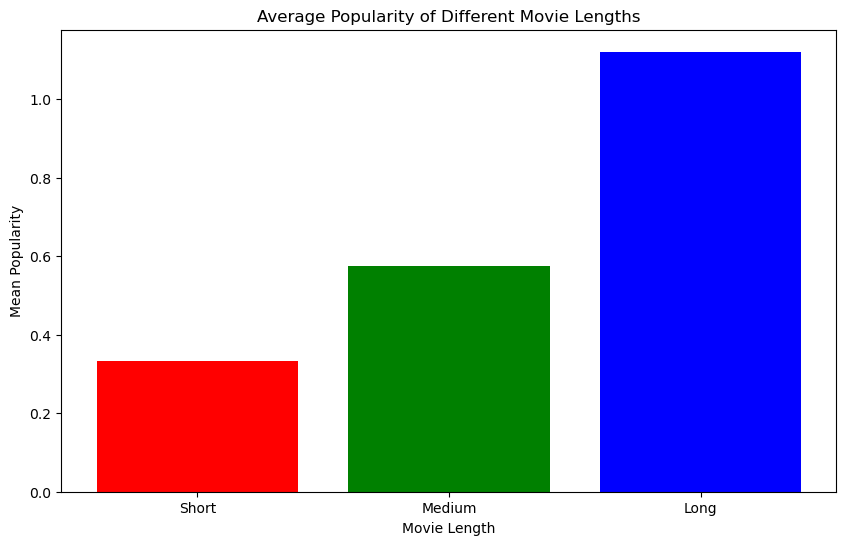

In [ ]:
# Create 3 movie groups: <60 min: short, 60 min <= <= - 120 min: medium, >120 min: long
short = df.query('runtime < {}'.format(60))
medium = df.query('runtime >= 60 and runtime <= 120')
longer = df.query('runtime > {}'.format(120))

# Check mean popularity of different movie lengths
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = longer['popularity'].mean()

# Create a bar chart of average popularity of different movie lengths
locations = [1, 2, 3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels = ['Short', 'Medium', 'Long']

plt.figure(figsize=(10, 6))
plt.bar(locations, heights, tick_label=labels, color=['red', 'green', 'blue'])
plt.title('Average Popularity of Different Movie Lengths')
plt.xlabel('Movie Length')
plt.ylabel('Mean Popularity')
plt.show()

**Long Movies (Runtime > 120 minutes):** Movies with longer runtimes, exceeding 120 minutes, tend to have the highest average popularity. Their extended duration provides more room for in-depth storytelling and character development, which often resonates with audiences and contributes to their higher popularity.

**Medium Movies (60 minutes <= Runtime <= 120 minutes):** Movies with moderate runtimes, between 60 and 120 minutes, exhibit the second-highest average popularity. They strike a balance between delivering a comprehensive narrative and maintaining audience engagement, resulting in a favorable level of popularity.

**Short Movies (Runtime < 60 minutes):** Movies with shorter runtimes, less than 60 minutes, experience the lowest average popularity. The limited time frame restricts the depth of storytelling, potentially leading to reduced audience engagement and consequently lower popularity.

In summary, there is a positive relationship between movie runtime and popularity, with longer movies generally garnering higher popularity due to their ability to offer more immersive storytelling.

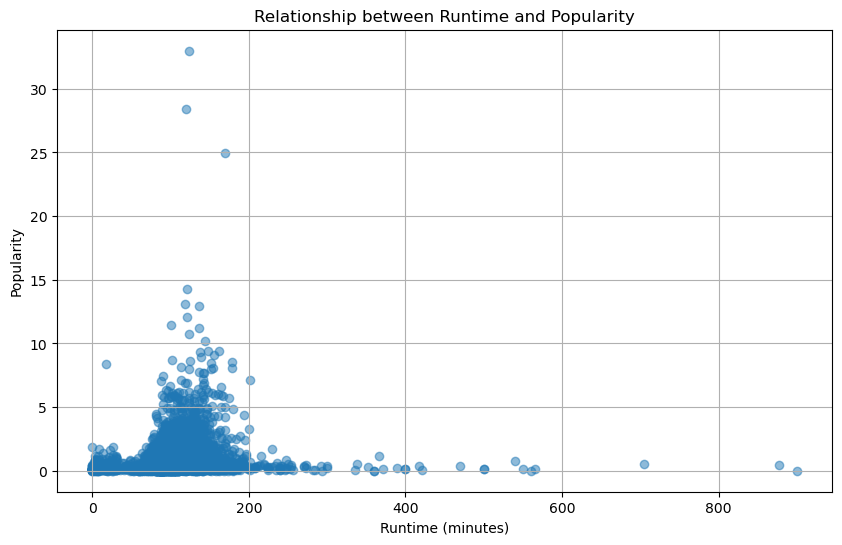

Correlation between runtime and popularity: 0.13903177277430567


In [ ]:
# scatterplot to determine the relation between runtime and popularity
runtime = df['runtime']
popularity = df['popularity']

plt.figure(figsize=(10, 6))
plt.scatter(runtime, popularity, alpha=0.5)
plt.title("Relationship between Runtime and Popularity")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()
# Calculate the correlation between runtime and popularity
correlation = df['runtime'].corr(df['popularity'])
print("Correlation between runtime and popularity:", correlation)

The correlation coefficient between runtime and popularity is approximately **0.139.** This value suggests a weak positive correlation between the two variables. In other words, there is a slight tendency that as the runtime of a movie increases, its popularity may also slightly increase. However, the correlation is not strong enough to make a definitive conclusion about the relationship between these two variables. Overall, the scatterplot indicates that there isn't a strong linear pattern between movie runtime and popularity.

### **Question 3:** Does higher popularity mean higher profits?

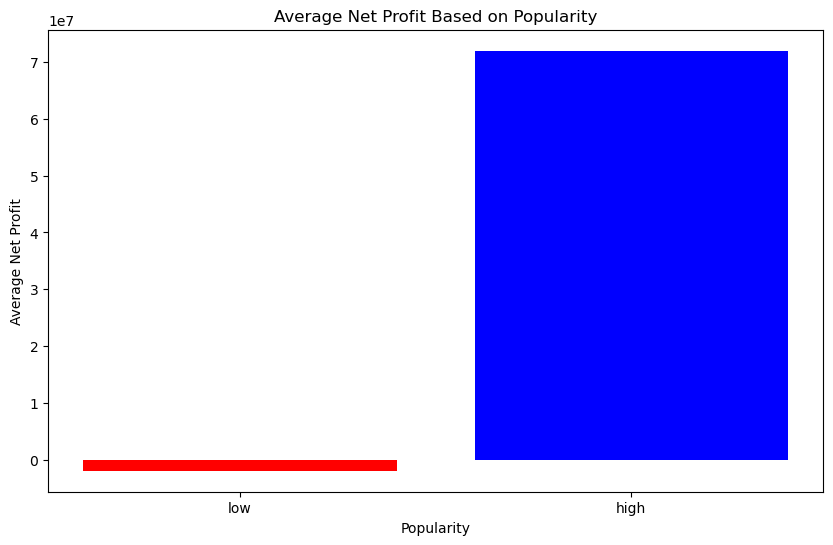

In [ ]:
# Getting the mean of popularity
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

# Creating a new column called profit (profit = revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Calculating the average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

# create a bar chart with the values we get above
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(locations, heights, tick_label=labels, color=['red', 'blue'])
plt.title('Average Net Profit Based on Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Net Profit')
plt.show()

### **Question 4:** What features are associated with the top 10 revenue movies?

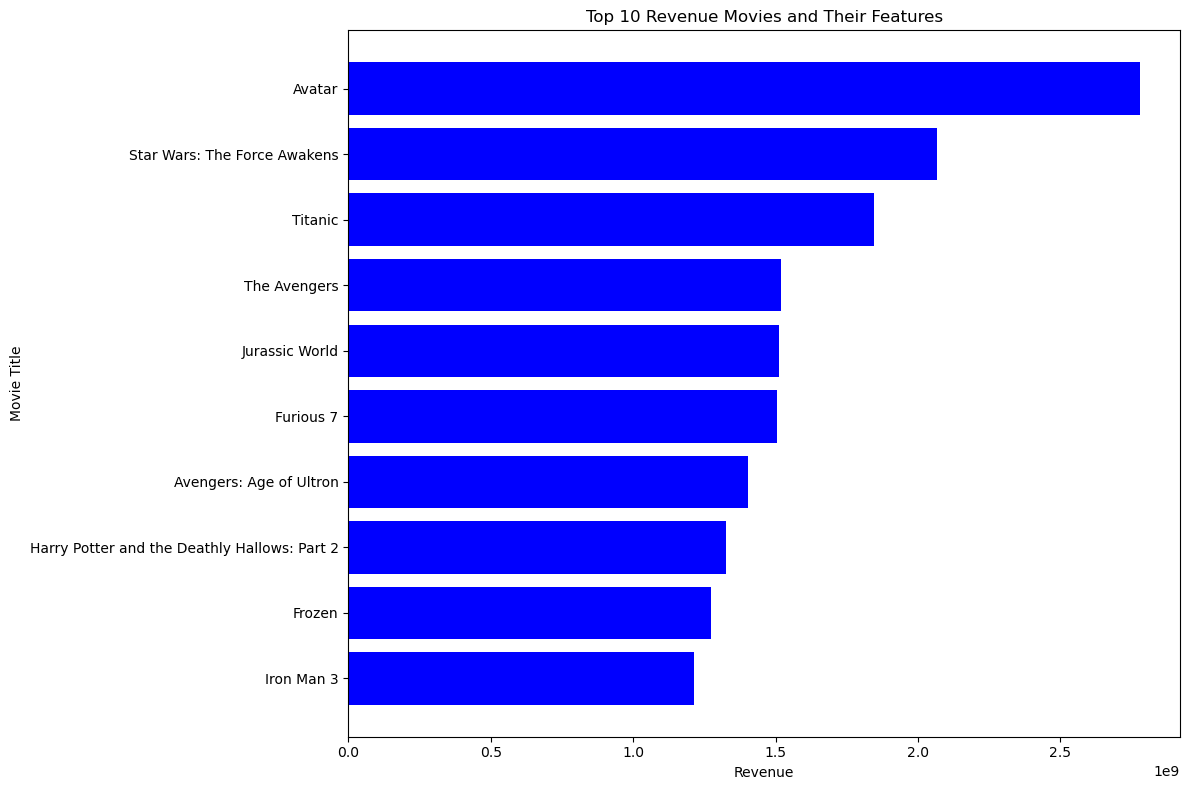

In [ ]:
# Get the top 10 revenue movies
top_revenue_movies = df.nlargest(10, 'revenue')

# Plotting the features associated with top 10 revenue movies
plt.figure(figsize=(12, 8))
plt.barh(top_revenue_movies['original_title'], top_revenue_movies['revenue'], color='blue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Revenue Movies and Their Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.tight_layout()
plt.show()

### **Question 5:** Which genres are most popular from year to year?

C:\Users\USER\AppData\Local\Temp\ipykernel_8200\2494072235.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_popular_genre_by_year = genre_popularity_by_year.groupby('release_year')['genres', 'popularity'].apply(


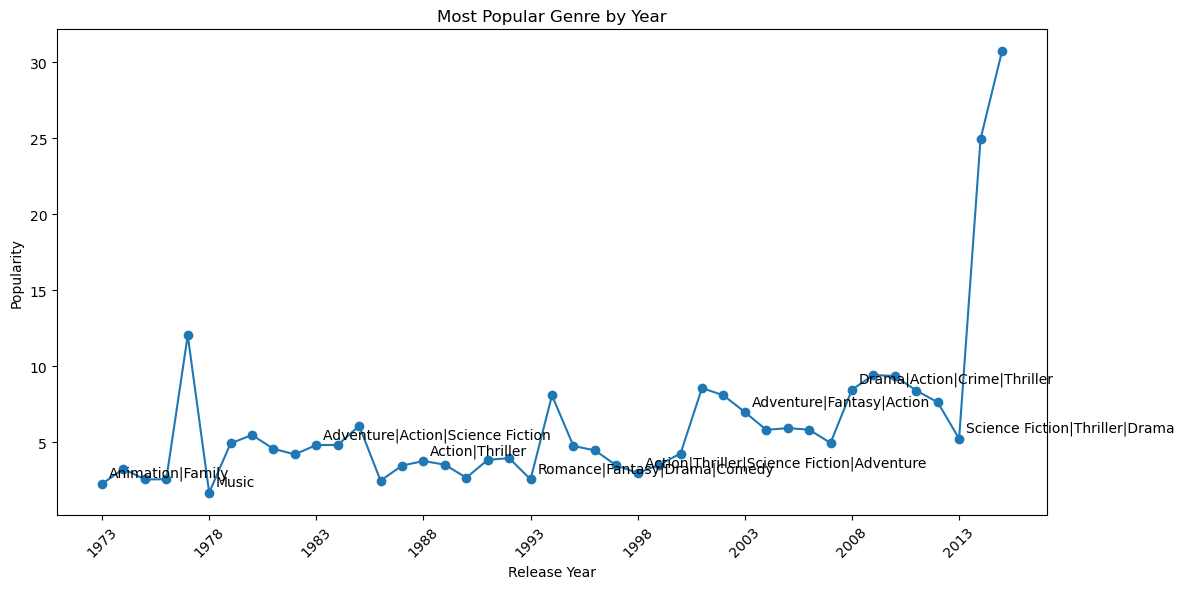

In [ ]:
# Extract year from release_date
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
# Filter data to include only years up to 2016
df = df[df['release_year'] <= 2016]

# Group data by release year and genre to calculate mean popularity
genre_popularity_by_year = df.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

# Get the most popular genre for each year
most_popular_genre_by_year = genre_popularity_by_year.groupby('release_year')['genres', 'popularity'].apply(
    lambda x: x.loc[x['popularity'].idxmax()]
).reset_index()

# Plotting the most popular genre by year
plt.figure(figsize=(12, 6))
plt.plot(most_popular_genre_by_year['release_year'], most_popular_genre_by_year['popularity'], marker='o')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Most Popular Genre by Year')
plt.xticks(rotation=45)

# Display every 5th year on the x-axis
plt.xticks(most_popular_genre_by_year[::5]['release_year'])

# Annotate the most popular genre for selected years
for year, genre, popularity in zip(most_popular_genre_by_year['release_year'][::5],
                                   most_popular_genre_by_year['genres'][::5],
                                   most_popular_genre_by_year['popularity'][::5]):
    plt.annotate(genre, xy=(year, popularity), xytext=(5,5), textcoords='offset points')

plt.tight_layout()
plt.show()

## Recommendations

**Invest in Higher Budget Movies:** The analysis suggests a positive correlation (correlation coefficient: 0.48) between a movie's budget and its popularity. This implies that movies with higher budgets tend to be more popular. To increase the chances of a movie's success, production companies might consider allocating higher budgets to their projects. However, it's important to note that other factors also contribute to a movie's popularity, so budget alone may not guarantee success.

**Focus on Movie Length:** The analysis indicates that movie length can influence popularity. Movies categorized as "long" (runtime > 120 minutes) tend to have higher average popularity compared to "short" and "medium" movies. This suggests that audiences might be more receptive to longer movies, possibly due to the ability to develop more intricate storylines and characters. However, this trend should be interpreted cautiously, as it's important to strike a balance between runtime and maintaining audience engagement.

## Challenge Solution

**Budget vs. Popularity Correlation:** While there's a correlation between budget and popularity, it's crucial to determine if higher budget directly causes higher popularity or if other factors contribute. External influences like marketing, cast, and release strategy could be confounding variables.

**Movie Length and Popularity:** The analysis assumes a direct relationship between movie length and popularity. However, viewer preferences vary, and shorter movies might appeal due to concise storytelling, while longer ones offer immersive experiences. Further research can unveil nuanced insights.

## Project Reflection and Improvement

### Did we have the right data?
The dataset used in the analysis provides valuable information for analysis, including movie attributes, genres, budgets, revenues, and more. However, the dataset does not cover recent years. While it's adequate for the analysis conducted, a more recent dataset could provide insights into evolving trends.

### Do we need other data to answer our question?
The dataset used is sufficient for the questions addressed in the analysis. However, to delve deeper into some areas, additional data could be beneficial. For example, understanding audience demographics, regional preferences, marketing strategies, and critical reviews could provide a more comprehensive perspective on factors influencing popularity and profitability.

### Did we have the right question?
The questions formulated for the analysis were appropriate for exploring various aspects of movie popularity, profitability, and genres. However, they could be further refined and expanded to include more nuanced considerations. For instance, questions about the impact of specific actors or directors on popularity, the influence of release timing, or the correlation between critical acclaim and box office success could add depth to the analysis.

## Recommendations

Based on the analysis of the movies dataset, the following recommendations can be made:

**Budget vs. Popularity:**

Movies with higher budgets tend to have a moderate positive correlation with popularity (correlation coefficient: 0.48). However, it's important to note that budget alone is not the sole determinant of a movie's popularity. The management should consider other factors such as genre, cast, and marketing strategies to enhance a movie's popularity.

**Movie Length and Popularity:**

Movie length does not seem to have a strong impact on either vote count or popularity. Although longer movies have slightly higher average popularity, the correlation is weak (correlation coefficient: 0.139). It's recommended to focus on producing quality content that engages the audience, rather than strictly adhering to a specific movie length.

**Popularity and Profitability:**

Movies with higher popularity do not necessarily translate to higher profits. While movies with higher popularity might attract more viewers, profitability is influenced by various factors, including budget, production costs, and marketing efforts. The management should ensure a balanced approach to maximize both popularity and profitability.

**Top Revenue Movie Features:**

To achieve high revenue, movies with certain attributes tend to perform well. The top revenue movies often have popular genres like Action, Adventure, Science Fiction, and Fantasy. They are also associated with specific production companies, cast members, and original languages. The management can consider investing in such attributes to increase the likelihood of higher revenue.

## Challenge Solutions

**Budget vs. Popularity:**
While a positive correlation between budget and popularity was observed, it's essential to consider confounding factors. For example, movies with larger budgets might also invest more in marketing and promotions, which can independently boost popularity. Further analysis could involve controlling for marketing expenditures to ascertain the true impact of budget on popularity.

**Movie Length and Popularity:**
The weak correlation between movie length and popularity might not capture nuanced viewer preferences. Certain genres might perform better with specific lengths. For instance, action-packed genres could have shorter ideal lengths, while dramas might require longer storytelling. The analysis could be enriched by segmenting movies based on genres and examining the correlation within those segments.

**Popularity and Profitability:**
The analysis focused on the relationship between popularity and profitability but didn't consider other variables that could affect profitability, such as distribution and licensing deals. A more comprehensive model could incorporate these factors to provide a holistic understanding of the relationship between popularity and profitability.

## Follow up Questions

1. It's essential to evaluate the suitability of the dataset in representing the entire scope of the movie industry. While the current dataset offers valuable insights, it might be beneficial to consider additional data sources. This could include information from box office records, critical reviews, and demographic data about viewers. Incorporating such data could provide a more comprehensive understanding of the factors influencing movie success.

2. While the provided dataset is insightful, there's potential to augment our analysis with external data sources. Data on marketing expenditures, competition from other entertainment forms, viewer demographics, and regional preferences could provide a more holistic view of the movie industry's dynamics. Integrating these external sources could enrich our insights and guide more effective decision-making.

3. It's crucial to ensure that our analysis questions align with the organization's strategic goals and objectives. While questions about budget and popularity are insightful, we could broaden our inquiries to uncover more nuanced insights. For instance, exploring the impact of specific genres on different audience segments or evaluating the effectiveness of diverse marketing strategies within various genres could yield deeper insights into the factors driving success.